# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [35]:
# Your code here.

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model 
from sklearn.metrics import classification_report


In [8]:
# define values
student_id = range(1,11)
age = [17,51,27,21,36,48,19,26,54,30]
tardiness = [10,1,5,9,4,2,9,6,0,3]

# create dataframe
student_data = pd.DataFrame({'student_id': student_id, 'age': age, 'tardiness': tardiness})

# check df
student_data


,student_id,age,tardiness
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

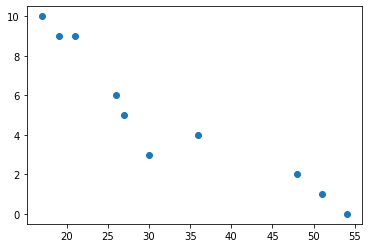

In [10]:
# Your code here.

# define first variable
x = student_data["age"]

# define second variable
y = student_data["tardiness"]

# create plot
plt.scatter(x,y)

# show plot
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 

# There seems to be a clear negative correlation


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
# Your response here.

#correlation:
print("Pearson:", stats.pearsonr(x, y))

#covariance:
print("Covariance:", np.cov(x, y))

# Comment: The covariance is the joint variability of the two variables. The correlation tells us that there is a strong negative correlation between the variables. In the covariance matrix one value is positive and the other negative, which means that when one value goes up, the other goes down (=negative correlation)


Pearson: (-0.939162688688712, 5.566653834553479e-05)
Covariance: [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [16]:
# Your response here.

# The dependent variable (y) will be the tardiness and the independent the age (x)
x = student_data[["age"]]
y = student_data["tardiness"]

# build a linear model, since the variables seem to be linearly related
# create model
model = linear_model.LinearRegression()

# fit data. train model
result = model.fit(x,y)


Plot your regression model on your scatter plot.

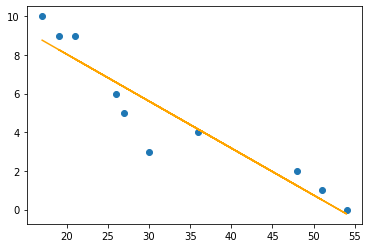

In [17]:
# Your code here.

# define regression line
regression_line = result.intercept_ + result.coef_*x

# plot regression line
plt.plot(x,regression_line, c="orange")

# scatter plot
plt.scatter(x,y)

# display plots
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [20]:
# Your response here. 

# print R2 score
print(result.score(x,y))

# Comment: The conclusion is that there seems to be a clear linear relationship between the two variables. The R2 score says that 88 percent of the variation in the tardiness can be explained by age. 


0.8820265558250109


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [21]:
# Import any libraries you may need & the data

# load dataset
vehicles = pd.read_csv("/Users/rickardramhoj/ironhack_assignments/lab-regression-analysis/your-code/vehicles.csv")

# check df
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [22]:
# Your response here. 

# use corr() on the set of columns 
vehicles[["CO2 Emission Grams/Mile", "Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]].corr()

# all independent variables, except Year show strong correlations. 


,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [30]:
# Your response here. 

X = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]] 

# dependent 
y = vehicles["CO2 Emission Grams/Mile"]

# create model using multivariate linear regression
model = linear_model.LinearRegression()

# fit data. train model
result = model.fit(X,y)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [38]:
# Your response here. 

# print R2
print(result.score(X, y))
                       
                    

# Comment: According to the R2 score, these independent variables account for 98 % of the variation in the dependent variable. 
#


0.9808734920269122


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [53]:
# Your code here.

# create df
df = pd.DataFrame({"X": [1,3,4,6,8,9,11,14], "Y": [1,2,4,4,5,7,8,13]})

# check df
df


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

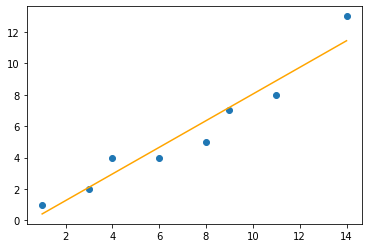

0.9316696375519905


In [55]:
# Your code here.

# define variables
x = df[["X"]]
y = df["Y"]

# create model
model = linear_model.LinearRegression()

# fit data. train model
result1 = model.fit(x,y)

# define regression line
regression_line = result1.intercept_ + result1.coef_*x

# plot regression line
plt.plot(x,regression_line, c="orange")

# create scatter plot
plt.scatter(x,y)

# display plot
plt.show()

# print model results
print(result1.score(x, y))

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

# It looks like there is a positive linear correlation between the variables. There is one observation slightly further away from the line


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

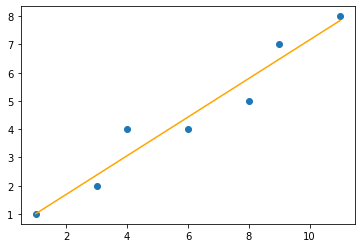

0.9433811802232854


In [56]:
# Your response here. 

# drop outlier
df.drop(7, inplace=True)

# define variables
x = df[["X"]]
y = df["Y"]

# create model
model = linear_model.LinearRegression()

# fit data. train model
result2 = model.fit(x,y)

# define regression line
regression_line = result2.intercept_ + result2.coef_*x

# plot regression line
plt.plot(x,regression_line, c="orange")

# create scatter plot
plt.scatter(x,y)

# display plot
plt.show()

# print model results
print(result2.score(x,y))


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

# Removing the point that was slightly further away from the line did not make a big difference to the result. There is a clear linear relation between the variables in both cases.
